# Cap. 6 - NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Métodos básicos para ndarrays


### Indexando e fatiando arrays

Uma array do numpy pode ser indexada ou fatiada como uma lista nativa do Python. Porém, ao fatiar arrays, o retorno é um view.

Vejamos:

In [ ]:
a = np.linspace(1, 6, 6)
a

array([1., 2., 3., 4., 5., 6.])

In [ ]:
a[1:4:2]# elementos a[1] e a[3] (com stride 2)

array([2., 4.])

In [ ]:
a[3::-2]

array([4., 2.])

No caso de mais de uma dimensão, cada eixo pode ser indexado ou fatiado.

In [ ]:
a = np.linspace(1, 12, 12).reshape(4, 3)
a

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [ ]:
a[3,1] #linha,coluna

11.0

In [ ]:
#usamos : para selecionar todos os índices
a[3,:]

array([10., 11., 12.])

In [ ]:
a[3,1:] #terceira linha, da coluna 1 pra frente

array([11., 12.])

In [ ]:
a[3,:-1] #terceira linha, até a coluna -1

array([10., 11.])

In [ ]:
a[1:-1,1:]

array([[5., 6.],
       [8., 9.]])

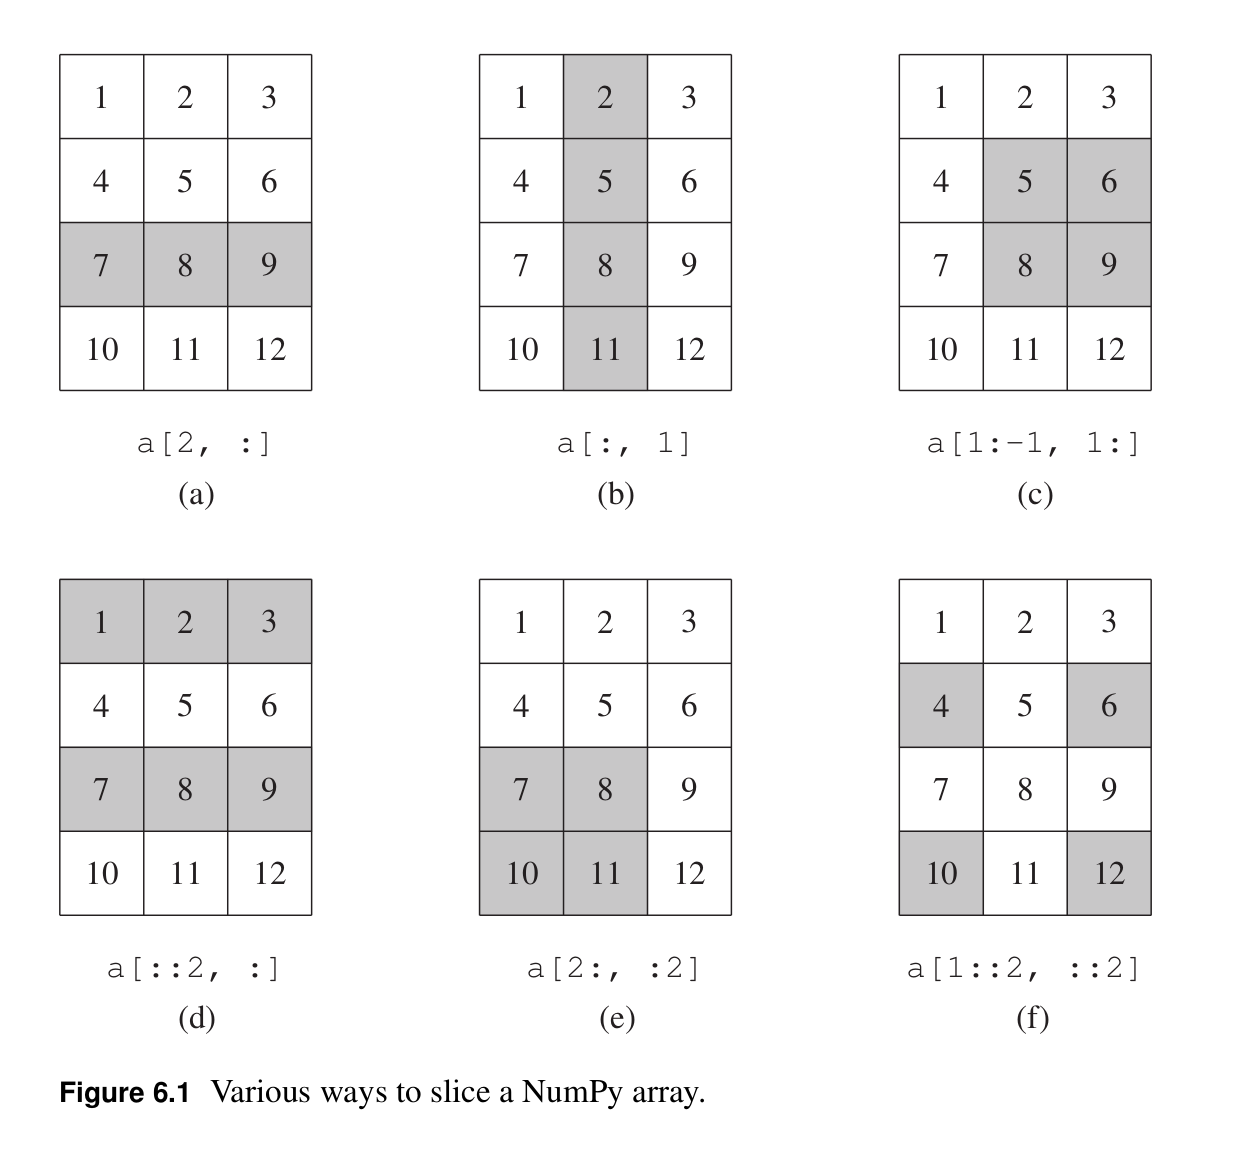

Para arrays de muitas dimensões, podemos usar ... para indicar todos os demais eixos.

In [ ]:
a = np.arange(1,2*2*4*4+1).reshape(2,2,4,4)
a

array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12],
         [13, 14, 15, 16]],

        [[17, 18, 19, 20],
         [21, 22, 23, 24],
         [25, 26, 27, 28],
         [29, 30, 31, 32]]],


       [[[33, 34, 35, 36],
         [37, 38, 39, 40],
         [41, 42, 43, 44],
         [45, 46, 47, 48]],

        [[49, 50, 51, 52],
         [53, 54, 55, 56],
         [57, 58, 59, 60],
         [61, 62, 63, 64]]]])

In [ ]:
a.shape

(2, 2, 4, 4)

In [ ]:
a[1,1,:,:]

array([[49, 50, 51, 52],
       [53, 54, 55, 56],
       [57, 58, 59, 60],
       [61, 62, 63, 64]])

In [ ]:
#ou podemos usar
a[1,1,...]

array([[49, 50, 51, 52],
       [53, 54, 55, 56],
       [57, 58, 59, 60],
       [61, 62, 63, 64]])

In [ ]:
#podemos usar : ou ... para fazer atribuições
a[1,1,...] = 0
a

array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12],
         [13, 14, 15, 16]],

        [[17, 18, 19, 20],
         [21, 22, 23, 24],
         [25, 26, 27, 28],
         [29, 30, 31, 32]]],


       [[[33, 34, 35, 36],
         [37, 38, 39, 40],
         [41, 42, 43, 44],
         [45, 46, 47, 48]],

        [[ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0]]]])

In [ ]:
a[:,:,:,2] = -100
a

array([[[[   1,    2, -100,    4],
         [   5,    6, -100,    8],
         [   9,   10, -100,   12],
         [  13,   14, -100,   16]],

        [[  17,   18, -100,   20],
         [  21,   22, -100,   24],
         [  25,   26, -100,   28],
         [  29,   30, -100,   32]]],


       [[[  33,   34, -100,   36],
         [  37,   38, -100,   40],
         [  41,   42, -100,   44],
         [  45,   46, -100,   48]],

        [[   0,    0, -100,    0],
         [   0,    0, -100,    0],
         [   0,    0, -100,    0],
         [   0,    0, -100,    0]]]])

**Indexação avançada**

Arrays do numpy também podem ser indexadas usando outras estruturas de listas (list, tuples, tuples de tuples, etc).

In [ ]:
a = np.linspace(0., 0.5, 6)
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [ ]:
ia = [1,4,5]
a[ia]

array([0.1, 0.4, 0.5])

In [ ]:
ia = np.array(((1 , 2), (3, 4)))
a[ia] #note que forma de ia é passada para a indexação

array([[0.1, 0.2],
       [0.3, 0.4]])

In [ ]:
a = np. linspace(1, 12, 12).reshape(4, 3)
a

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [ ]:
ia = np.array(((1 , 0), (2, 1)))
ja = np.array(((0 , 1), (1, 2)))

In [ ]:
a[ia,ja] #combina os elementos de ia com ja

array([[4., 2.],
       [8., 6.]])

Também podemos usar uma lista de bools como índice. Nesse caso, os elementos True são selecionados.

In [ ]:
a = np.array([-2, -1, 0, 1, 2])
ia = np.array([False, True, False, True, True])

In [ ]:
a[ia]

array([-1,  1,  2])

Podemos usar o resultado de expressões lógicas como index:

In [ ]:
a<0

array([ True,  True, False, False, False])

In [ ]:
a[a<0] #seleciona os número negativos

array([-2, -1])

In [ ]:
a[a>=0] #seleciona os número positivos

array([0, 1, 2])

In [ ]:
anos = np.array([1900, 1904, 1990, 1993, 2000, 2014, 2016, 2024, 2100])

In [ ]:
# divisível por 4 ou divisível por 400 e não divisível por 100
bissexto = (anos % 4 == 0) | (anos % 400 == 0) & ~(anos % 100 == 0)
bissexto

array([ True,  True, False, False,  True, False,  True,  True,  True])

In [ ]:
anos[bissexto]

array([1900, 1904, 2000, 2016, 2024, 2100])

**Adicionando uma nova dimensão**

In [ ]:
a = np.linspace(1, 4, 4).reshape(2, 2)
a

array([[1., 2.],
       [3., 4.]])

In [ ]:
a.shape

(2, 2)

In [ ]:
a[1][1][0]

IndexError: invalid index to scalar variable.

In [ ]:
b = a[:,:,np.newaxis]
b

array([[[1.],
        [2.]],

       [[3.],
        [4.]]])

In [ ]:
b.shape

(2, 2, 1)

In [ ]:
#podemos usar também None
a[:,:,None]

array([[[1.],
        [2.]],

       [[3.],
        [4.]]])

*Exemplo E6.4* Validando um tabuleiro de Sudoku.

Para ser válido, devemos ter uma matriz 9x9 na qual todas as linhas e colunas contenham os números de 1 a 9; e que blocos 3x3 não superpostos também contenham esses números.

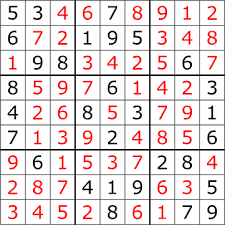

In [ ]:
sudoku = """145327698
            839654127
            672918543
            496185372
            218473956
            753296481
            367542819
            984761235
            521839764"""

grid = np.array([[int(i) for i in line] for line in sudoku.split()])

grid

array([[1, 4, 5, 3, 2, 7, 6, 9, 8],
       [8, 3, 9, 6, 5, 4, 1, 2, 7],
       [6, 7, 2, 9, 1, 8, 5, 4, 3],
       [4, 9, 6, 1, 8, 5, 3, 7, 2],
       [2, 1, 8, 4, 7, 3, 9, 5, 6],
       [7, 5, 3, 2, 9, 6, 4, 8, 1],
       [3, 6, 7, 5, 4, 2, 8, 1, 9],
       [9, 8, 4, 7, 6, 1, 2, 3, 5],
       [5, 2, 1, 8, 3, 9, 7, 6, 4]])

<Axes: >

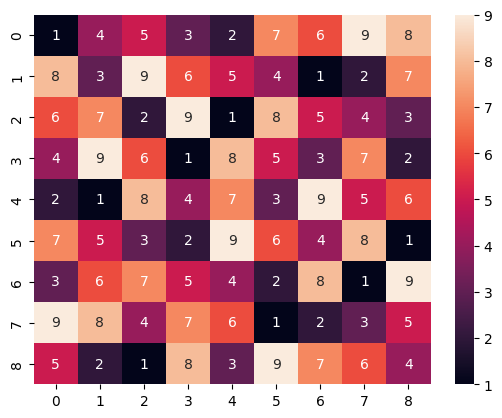

In [ ]:
sns.heatmap(grid,annot=True)

In [ ]:
len(set([1,2,3,4,5,6,7,8,8]))

8

In [ ]:
len(set(grid[0,:]))

9

In [ ]:
grid[0:3,0:3].ravel()

array([5, 4, 5, 8, 3, 9, 6, 7, 2])

In [ ]:
def valida_sudoku(grid):
    """Retorna True se for válido ou False caso contrário. """
    for i in range(9):

        # j, k calcula os índices dos cantos 3x3
        # veja abaixo
        j, k = (i // 3)*3, (i % 3)*3

        linha_9  = len(set(grid[i,:])) != 9 #verifica se a linha tem 1...9
        coluna_9 = len(set(grid[:,i])) != 9 #verifica se a coluna tem 1...9
        #verifica se o bloco 3x4 tem 1...9
        bloco3x3_9 = len(set(grid[j:j+3, k:k+3].ravel())) != 9
        # print(linha_9,coluna_9,bloco3x3_9)
        if (linha_9) or (coluna_9) or (bloco3x3_9):
            return False

    return True

In [ ]:
for i in range(9):
   print((i//3)*3, (i%3)*3)

0 0
0 3
0 6
3 0
3 3
3 6
6 0
6 3
6 6


In [ ]:
grid

array([[1, 4, 5, 3, 2, 7, 6, 9, 8],
       [8, 3, 9, 6, 5, 4, 1, 2, 7],
       [6, 7, 2, 9, 1, 8, 5, 4, 3],
       [4, 9, 6, 1, 8, 5, 3, 7, 2],
       [2, 1, 8, 4, 7, 3, 9, 5, 6],
       [7, 5, 3, 2, 9, 6, 4, 8, 1],
       [3, 6, 7, 5, 4, 2, 8, 1, 9],
       [9, 8, 4, 7, 6, 1, 2, 3, 5],
       [5, 2, 1, 8, 3, 9, 7, 6, 4]])

In [ ]:
valida_sudoku(grid)

True

In [ ]:
grid[0,0]=5

In [ ]:
grid

array([[5, 4, 5, 3, 2, 7, 6, 9, 8],
       [8, 3, 9, 6, 5, 4, 1, 2, 7],
       [6, 7, 2, 9, 1, 8, 5, 4, 3],
       [4, 9, 6, 1, 8, 5, 3, 7, 2],
       [2, 1, 8, 4, 7, 3, 9, 5, 6],
       [7, 5, 3, 2, 9, 6, 4, 8, 1],
       [3, 6, 7, 5, 4, 2, 8, 1, 9],
       [9, 8, 4, 7, 6, 1, 2, 3, 5],
       [5, 2, 1, 8, 3, 9, 7, 6, 4]])

In [ ]:
valida_sudoku(grid)

False

**Criando malhas com o np.meshgrid**

Esse tipo de estrutura é muito útil para avaliar funções 3d num grid xy.

Vejamos:

In [ ]:
x = np.linspace(0, 5, 6)
y = np.linspace(0, 3, 4)

X, Y = np.meshgrid(x,y)

In [ ]:
x,y

(array([0., 1., 2., 3., 4., 5.]), array([0., 1., 2., 3.]))

In [ ]:
X

array([[0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.]])

In [ ]:
Y

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3.]])

Combinado X e Y, temos todos os pares i,j com i,j=0,...5

In [ ]:
np.stack((X,Y)).T

array([[[0., 0.],
        [0., 1.],
        [0., 2.],
        [0., 3.]],

       [[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.]],

       [[2., 0.],
        [2., 1.],
        [2., 2.],
        [2., 3.]],

       [[3., 0.],
        [3., 1.],
        [3., 2.],
        [3., 3.]],

       [[4., 0.],
        [4., 1.],
        [4., 2.],
        [4., 3.]],

       [[5., 0.],
        [5., 1.],
        [5., 2.],
        [5., 3.]]])

In [ ]:
np.vstack(np.stack((X,Y)).T)

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [2., 3.],
       [3., 0.],
       [3., 1.],
       [3., 2.],
       [3., 3.],
       [4., 0.],
       [4., 1.],
       [4., 2.],
       [4., 3.],
       [5., 0.],
       [5., 1.],
       [5., 2.],
       [5., 3.]])

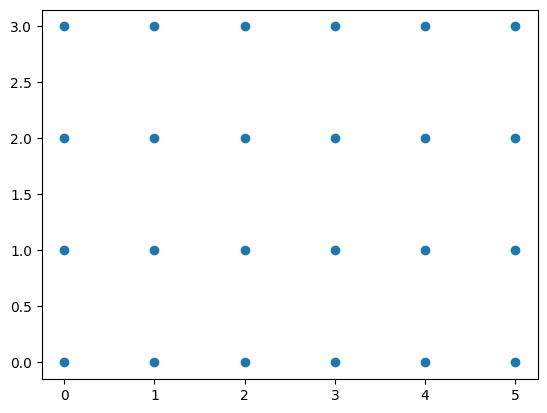

In [ ]:
plt.scatter(*np.vstack(np.stack((X,Y)).T).T)

In [ ]:
def gauss3d(x,y):
    return np.exp(-(x**2+y**2)/2)

In [ ]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x,y)
Z = gauss3d(X,Y)

In [ ]:
Z.shape

(100, 100)

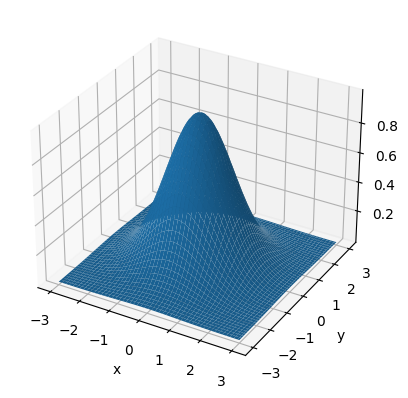

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Surface(x=X,y=Y,z=Z))
fig.show()

In [ ]:
def pacotegauss3d(x,y,omega=4):
    return np.sin((x+y)*omega)*np.exp(-(x**2+y**2)/(2*1.))

x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x,y)
Z = pacotegauss3d(X,Y)

In [ ]:
fig = go.Figure(go.Surface(x=X,y=Y,z=Z))
fig.show()

### Broadcasting

Já vimos que operações entre arrays do numpy com um mesmo *shape* não executadas elemento a elemento, por exemplo:


In [ ]:
a = np.array([1, 2, 3])
b = np.array([0, 10, 100])

a*b

array([  0,  20, 300])

*Broadcasting* é o nome que se dá para as regras que o numpy usa para fazer esse tipo de operação quando as arrays têm dimensões diferentes.

Esse tipo de operação é muito eficiente do ponto de vista computacional.

Apenas operações entre arrays com dimensões compatíveis são possíveis de *broadcasting*. Duas dimensões são compatíveis quando elas têm o mesmo tamanho ou se uma delas tiver tamanho unitário.

O caso mais simples de *broadcasting* envolve uma array e um escalar (um dimensão de tamanho 1):

In [ ]:
a = np.array([[1 , 2, 3], [4, 5, 6]])
b = 2

c = a*b
c

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [ ]:
a.shape

(2, 3)

Nesse caso:

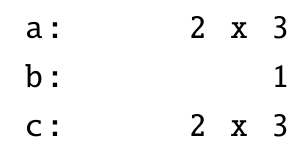

Uma outra possibilidade:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array ([1, 2, 3])

c = a*b
c

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [ ]:
a.shape, b.shape, c.shape

((2, 3), (3,), (2, 3))

Nesse caso:

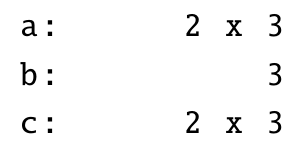

Porém, de *b* tiver apenas 2 elementos:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])

c = a*b
c

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [ ]:
a.shape, b.shape

((2, 3), (2,))

Se a ideia for multiplicar os elementos as linhas de a pelos elementos de b, podemos fazer

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[1], [2]])
c = a*b
c

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [ ]:
a.shape, b.shape

((2, 3), (2, 1))

ou também:

In [ ]:
b[:,np.newaxis].shape

(2, 1)

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1,2])

a*b[:,np.newaxis]

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [ ]:
b[:,np.newaxis]

Como outro exemplo, podemos calcular o produto externo.

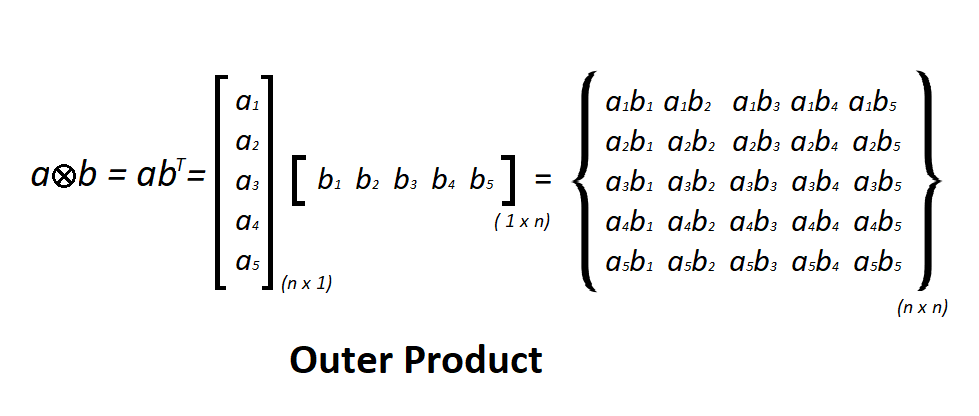

In [ ]:
a = np.array([1, 2, 3])
b = np.array([0, 10, 3])

In [ ]:
a*b

array([ 0, 20,  9])

In [ ]:
a[:,np.newaxis],a[:,np.newaxis].shape

(array([[1],
        [2],
        [3]]),
 (3, 1))

In [ ]:
b, b.shape

(array([ 0, 10,  3]), (3,))

In [ ]:
a[:,None]*b

array([[ 0, 10,  3],
       [ 0, 20,  6],
       [ 0, 30,  9]])

Nesse caso:

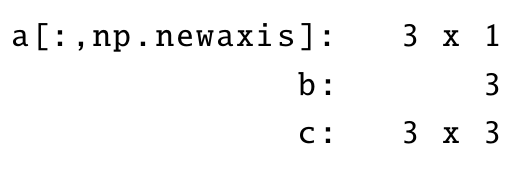

### Valores máximos e mínimos

Os métodos `.min()` e `.max()` retornam os valores mínimos e máximos (respectivamente) de array numpy. Por padrão, esses valores são calculados considerando todos os elementos, mas podemos modificar esse comportamento usando o argumento `axis`. Vejamos:

In [ ]:
a = np.array([[3, 0, -1, 1], [2, -1, -2, 4], [1, 7, 0, 4]])
a

array([[ 3,  0, -1,  1],
       [ 2, -1, -2,  4],
       [ 1,  7,  0,  4]])

In [ ]:
a.min(),a.max()

(-2, 7)

In [ ]:
#outra possibilidade
np.min(a),np.max(a)

(-2, 7)

In [ ]:
a.min(axis=0) #mínimo de cada coluna

array([ 1, -1, -2,  1])

In [ ]:
a.max(axis=1) #máximo de cada linha

array([3, 4, 7])

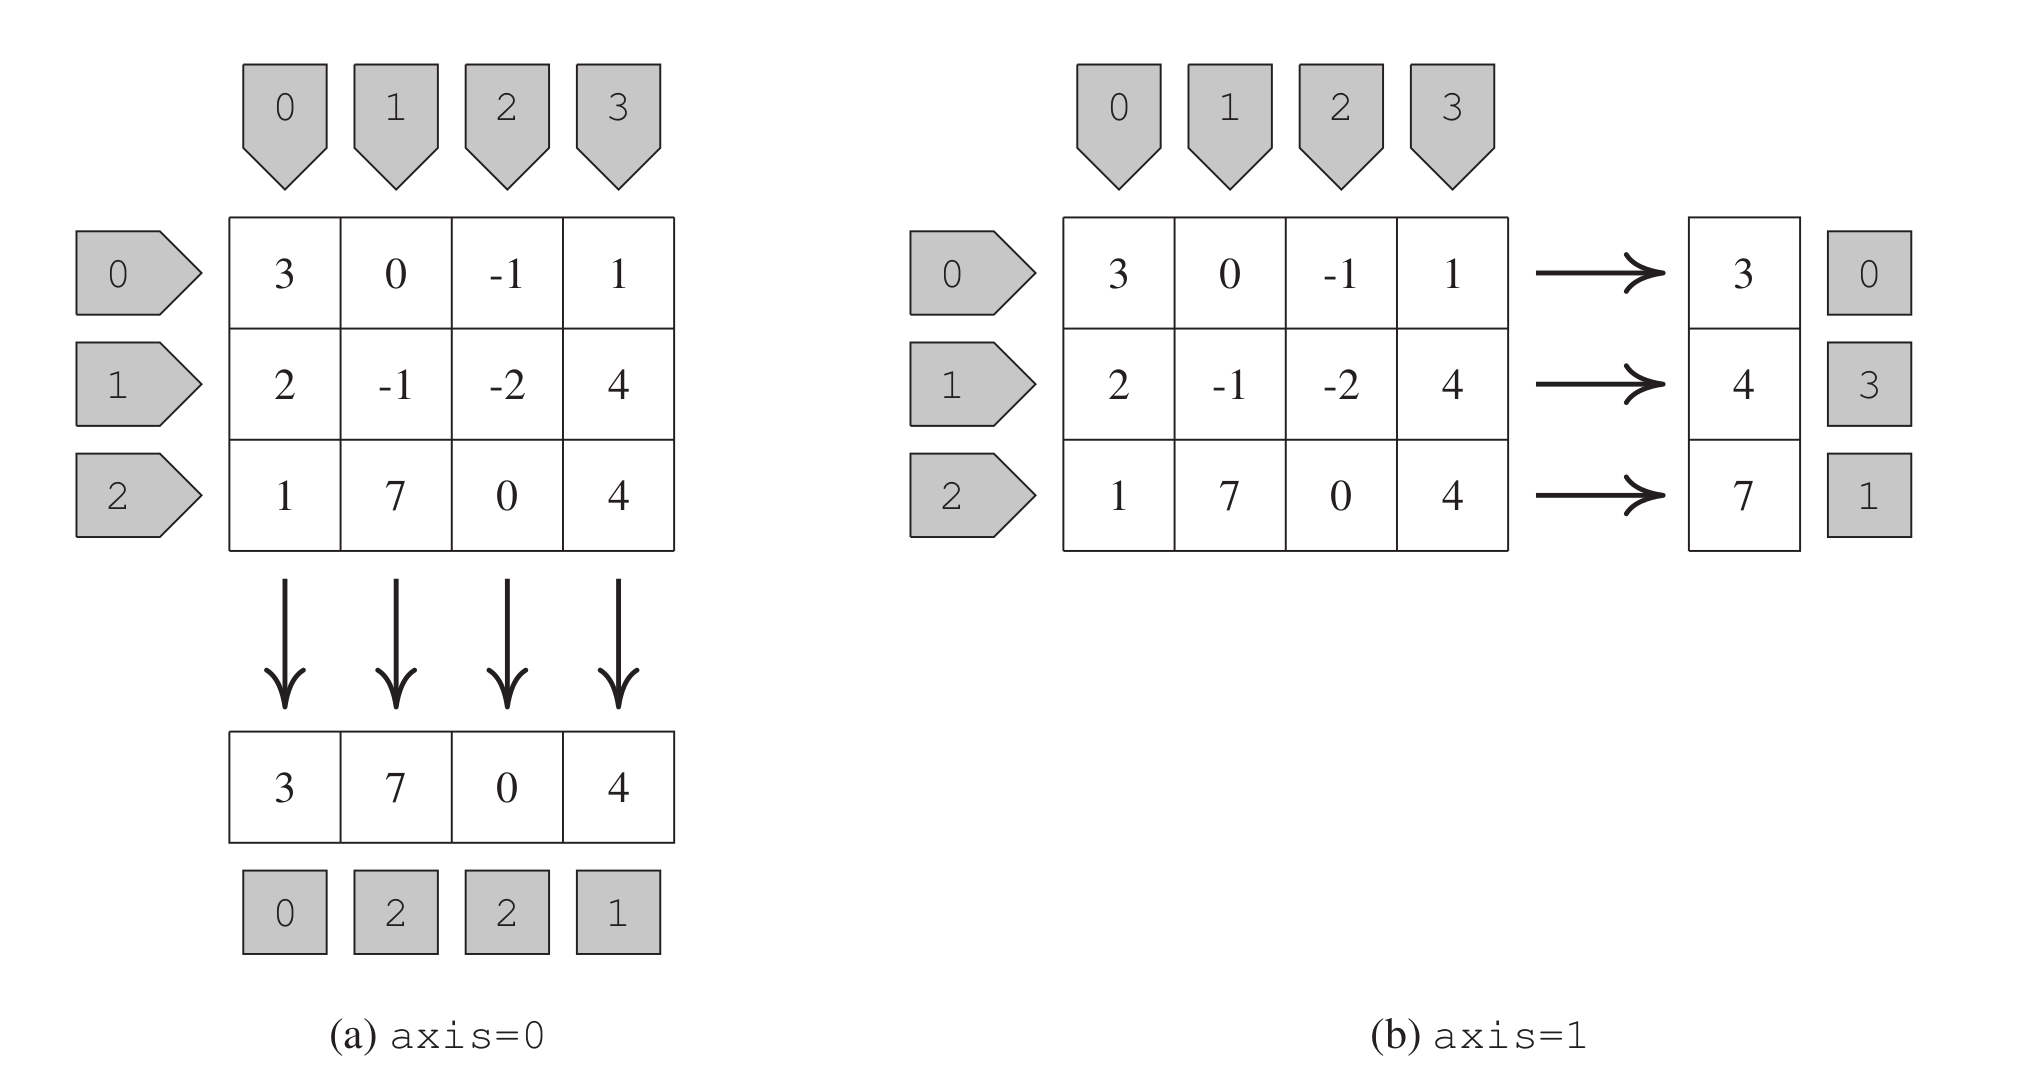

Existem muitos casos em que estão interessados em encontrar a posição de máximo ou mínimo e não o seu valor. Para isso podemos usar `.argmax()` e `.argmin()`

In [ ]:
a

array([[ 3,  0, -1,  1],
       [ 2, -1, -2,  4],
       [ 1,  7,  0,  4]])

In [ ]:
#note o retorno não é uma tupla e sim a posição no array flattened
a.argmax()

9

In [ ]:
a.flatten()[9]

7

In [ ]:
?np.unravel_index

In [ ]:
#para ter uma tupla, podemos usar o np.unravel_index
np.unravel_index(a.argmax(), a.shape)

(2, 1)

In [ ]:
#o argumento axis também está disponível
a.argmin(axis=0) #posição dos mínimos em cada coluna

array([2, 1, 1, 0])

In [ ]:
#o argumento axis também está disponível
a.argmax(axis=1) #posição dos máximos em cada linha

array([0, 3, 1])

*Exemplo E6.5:* Gráfico dos máximos e mínimos da função

$$
f_n(x) = x(L-x) \sin\left(\frac{2\pi x}{\lambda_n}\right)
$$
com

$$
\lambda_n = \frac{2L}{n}
$$

Aqui $L$ é um parâmetro e $n=1,2,3,\dots$ é o índice da função.

In [ ]:
def f(n=1, L=1, divs=1000):
    x = np.linspace(0,L,divs)
    y = x*(L-x)*np.sin(n*np.pi*x/L)

    return x,y

Text(0, 0.5, '$f_n(x)$')

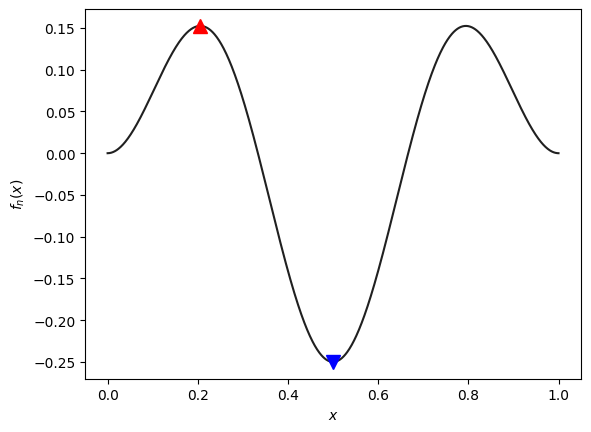

In [ ]:
x,y = f(3)

imin,imax = np.argmin(y),np.argmax(y)

plt.plot(x, y, color='#202020')
plt.plot([x[imin]], [y[imin]],'v',color='blue',ms=10)
plt.plot([x[imax]], [y[imax]],'^',color='red',ms=10)

plt.xlabel(r'$x$')
plt.ylabel(r'$f_n(x)$')

In [ ]:
!pip install palettable
import palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 2.9 MB/s eta 0:00:00


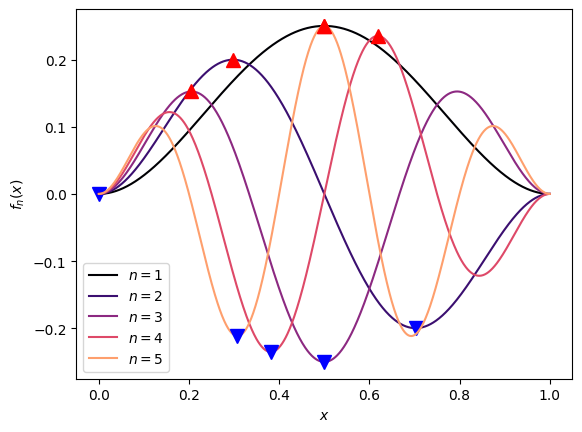

In [ ]:
clist = palettable.matplotlib.Magma_6.hex_colors

for i,n in enumerate(np.arange(1,5+1)):
    x,y = f(n)

    imin,imax = np.argmin(y),np.argmax(y)

    plt.plot(x, y, color=clist[i], label=f'$n={n}$')
    plt.plot([x[imin]], [y[imin]], 'v', color='blue', ms=10)
    plt.plot([x[imax]], [y[imax]], '^', color='red',  ms=10)

    plt.legend()

    plt.xlabel(r'$x$')
    plt.ylabel(r'$f_n(x)$')

### Ordenando arrays

O método `.sort()` ordena um array *in place*. Além disso, no caso de arrays multidimensionais, por padrão, esse método ordena a array usando o último eixo. Podemos mudar esse comportamento com o argumento `axis`.

Vejamos:



In [ ]:
a = np.array([5, -1, 2, 4, 0, 4])

In [ ]:
a.sort()

In [ ]:
a

array([-1,  0,  2,  4,  4,  5])

In [ ]:
b = np.array([[0 , 3, -2], [7, 1, 3], [4, 0, -1]])
b

array([[ 0,  3, -2],
       [ 7,  1,  3],
       [ 4,  0, -1]])

In [ ]:
b = np.array([[0 , 3, -2], [7, 1, 3], [4, 0, -1]])
b.sort() #por padrão é o último eixo. Aqui, axis=1, ou seja, para da linha,
         #ordena ao longo das colunas.
b

array([[-2,  0,  3],
       [ 1,  3,  7],
       [-1,  0,  4]])

In [ ]:
b = np.array([[0 , 3, -2], [7, 1, 3], [4, 0, -1]])
b.sort(axis=1) #mesmo resultado
b

array([[-2,  0,  3],
       [ 1,  3,  7],
       [-1,  0,  4]])

In [ ]:
b = np.array([[0 , 3, -2], [7, 1, 3], [4, 0, -1]])
b

array([[ 0,  3, -2],
       [ 7,  1,  3],
       [ 4,  0, -1]])

In [ ]:
b = np.array([[0 , 3, -2], [7, 1, 3], [4, 0, -1]])
b.sort(axis=0) #axis=0, ou seja, para coluna, ordena ao longo das linhas.
b

array([[ 0,  0, -2],
       [ 4,  1, -1],
       [ 7,  3,  3]])

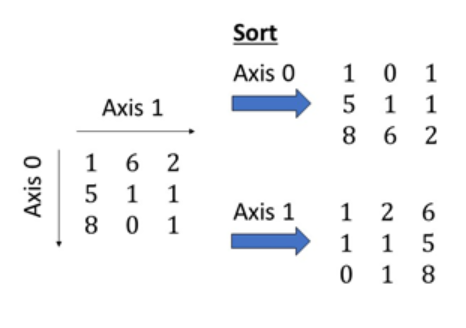

In [ ]:
b = np.array([[0 , 3, -2], [7, 1, 3], [4, 0, -1]])
np.sort(b) #não modifica o array

array([[-2,  0,  3],
       [ 1,  3,  7],
       [-1,  0,  4]])

In [ ]:
b

array([[ 0,  3, -2],
       [ 7,  1,  3],
       [ 4,  0, -1]])

Outros comandos de ordenamento úteis são:

- `np.argsort`: retorna os índices que ordenam o array;
- `np.searchsorted`: identifica a posição de novos valores entram num array ordenado.

In [ ]:
a = np.array([3, 0, -1, 1])
np.argsort(a) #índice do menor valor, índice do segundo menor, etc.

array([2, 1, 3, 0])

In [ ]:
a[np.argsort(a)]

array([-1,  0,  1,  3])

In [ ]:
a[np.argsort(-a)] #ordem decrescente

array([ 3,  1,  0, -1])

In [ ]:
np.sort(a)[::-1] #ordem decrescente

array([ 3,  1,  0, -1])

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
np.searchsorted(a, 3.5) #posição que 3.5 entra no array mantendo a ordem crescente

3

In [ ]:
a[3] #deve ser inserido imediatamente antes

4

In [ ]:
np.searchsorted(a, (3.5, 0, 1.1))

array([3, 0, 1])

### Arrays estruturados

Arrays estruturados são um tipo de dado tabular no qual cada coluna tem o seu próprio tipo e nome. Esse tipo de estrutura de dados é útil para manipular dados heterogêneos. No Capítulo 9 veremos o módulo pandas, o qual tem o mesmo propósito e oferece muito mais funcionalidades.

Para criar um array estruturado, fazemos:

In [ ]:
a = np.zeros(5, dtype='int8, float32, complex')
a

array([(0, 0., 0.+0.j), (0, 0., 0.+0.j), (0, 0., 0.+0.j), (0, 0., 0.+0.j),
       (0, 0., 0.+0.j)],
      dtype=[('f0', 'i1'), ('f1', '<f4'), ('f2', '<c16')])

Nesse caso, temos tuplas de valores, sendo o primeiro elemento do tipo int, o segundo do tipo float e o terceiro do tipo complex.

Além disso, como não definimos os nomes das colunas, o numpy usou 'f0','f1' e 'f2'.

Podemos acessar os valores usando esses nome, tal qual um dicionário:

In [ ]:
a['f0']

array([0, 0, 0, 0, 0], dtype=int8)

In [ ]:
a['f2']

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

Podemos também definir um dtype específico e usá-lo para criar esse tipo de estrutura:

In [ ]:
dt = np.dtype([('time', 'f8'), ('signal', 'i4')] )
dt

dtype([('time', '<f8'), ('signal', '<i4')])

In [ ]:
a = np.zeros(10, dtype=dt)
a

array([(0., 0), (0., 0), (0., 0), (0., 0), (0., 0), (0., 0), (0., 0),
       (0., 0), (0., 0), (0., 0)],
      dtype=[('time', '<f8'), ('signal', '<i4')])

In [ ]:
# podemos acessar os elementos como em qualquer array
a[0]

(0., 0)

In [ ]:
# e também fazer atribuições
a[0] = (0,4)

In [ ]:
a

array([(0., 4), (0., 0), (0., 0), (0., 0), (0., 0), (0., 0), (0., 0),
       (0., 0), (0., 0), (0., 0)],
      dtype=[('time', '<f8'), ('signal', '<i4')])

In [ ]:
# ou usar os nomes para fazer atribuições a colunas
a['time']

In [ ]:
a['time'] = np.linspace (0., 4.5, 10)
a

array([(0. , 4), (0.5, 0), (1. , 0), (1.5, 0), (2. , 0), (2.5, 0),
       (3. , 0), (3.5, 0), (4. , 0), (4.5, 0)],
      dtype=[('time', '<f8'), ('signal', '<i4')])

In [ ]:
a['time']

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [ ]:
#trata-se de view do array e todos os métodos estão disponíveis
a['time'].min(), a['time'].max()

(0.0, 4.5)

In [ ]:
a['signal'].min(), a['signal'].max()

(0, 4)

Também podemos usar um dicionário para definir um dtype. Além disso, existe uma terceira funcionalidade: *titles*, que é usada para atribuir uma descrição mais detalhada para a coluna. Por exemplo,

In [ ]:
dt = np.dtype({'names': ['candidato', 'nota', 'conceito'],
               'formats': ['|S50', 'u1', '|S2'],
               'titles': ['Nome do candidato', 'Nota', 'Conceito: A-F']})

In [ ]:
dt

dtype([(('Nome do candidato', 'candidato'), 'S50'), (('Nota', 'nota'), 'u1'), (('Conceito: A-F', 'conceito'), 'S2')])

In [ ]:
a = np.zeros(10, dtype=dt)
a

array([(b'', 0, b''), (b'', 0, b''), (b'', 0, b''), (b'', 0, b''),
       (b'', 0, b''), (b'', 0, b''), (b'', 0, b''), (b'', 0, b''),
       (b'', 0, b''), (b'', 0, b'')],
      dtype=[(('Nome do candidato', 'candidato'), 'S50'), (('Nota', 'nota'), 'u1'), (('Conceito: A-F', 'conceito'), 'S2')])

In [ ]:
a[0] = ('John Brown', 64, 'B-')
a[1] = ('Jane Smith', 78, 'A')

In [ ]:
a

array([(b'John Brown', 64, b'B-'), (b'Jane Smith', 78, b'A'),
       (b'',  0, b''), (b'',  0, b''), (b'',  0, b''), (b'',  0, b''),
       (b'',  0, b''), (b'',  0, b''), (b'',  0, b''), (b'',  0, b'')],
      dtype=[(('Nome do candidato', 'candidato'), 'S50'), (('Nota', 'nota'), 'u1'), (('Conceito: A-F', 'conceito'), 'S2')])

In [ ]:
a['candidato']

array([b'John Brown', b'Jane Smith', b'', b'', b'', b'', b'', b'', b'',
       b''], dtype='|S50')

In [ ]:
#podemos acessar os valores usando o título.
a['Nome do candidato']

array([b'John Brown', b'Jane Smith', b'', b'', b'', b'', b'', b'', b'',
       b''], dtype='|S50')

Podemos ordenar arrays estruturados usando cada umas das colunas:

In [ ]:
data = [('NiCd',        1.2, 0.14, 2000),
        ('Lead acid',   2.1, 0.14,  700),
        ('Lithium ion', 3.6, 0.46,  800)]


dtype = [('name',             '|S20'),
         ('voltage',          'f8'  ),
         ('specific energy',  'f8'  ),
         ('cycle durability', 'i4'  )]

a = np.array(data, dtype)
a

array([(b'NiCd', 1.2, 0.14, 2000), (b'Lead acid', 2.1, 0.14,  700),
       (b'Lithium ion', 3.6, 0.46,  800)],
      dtype=[('name', 'S20'), ('voltage', '<f8'), ('specific energy', '<f8'), ('cycle durability', '<i4')])

In [ ]:
a.sort(order='specific energy')
a

array([(b'Lead acid', 2.1, 0.14,  700), (b'NiCd', 1.2, 0.14, 2000),
       (b'Lithium ion', 3.6, 0.46,  800)],
      dtype=[('name', 'S20'), ('voltage', '<f8'), ('specific energy', '<f8'), ('cycle durability', '<i4')])

In [ ]:
a.sort(order=['cycle durability'])
a

array([(b'Lead acid', 2.1, 0.14,  700), (b'Lithium ion', 3.6, 0.46,  800),
       (b'NiCd', 1.2, 0.14, 2000)],
      dtype=[('name', 'S20'), ('voltage', '<f8'), ('specific energy', '<f8'), ('cycle durability', '<i4')])

### Arrays como vetores em n-dimensões

Podemos usar a estrutura de um array unidimensional para representar vetor em $n$ dimensões.



In [ ]:
#vetores no espaço
a = np.array([1, 0, -3])
b = np.array([2, -2, 5])

In [ ]:
#produto escalar
a.dot(b), np.dot(a,b)

(-13, -13)

In [ ]:
#produto vetorial
np.cross(a,b)

array([ -6, -11,  -2])

O produto vetorial só funciona para vetores com dois ou três elementos

In [ ]:
a = np.array([1, 0, 1, 1])
b = np.array([2, -2, 1, 1])
np.cross(a,b)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

### Comparações lógicas em arrays

Existe um conjunto de métodos que fazem comparações lógicas em arrays elemento a elemento:

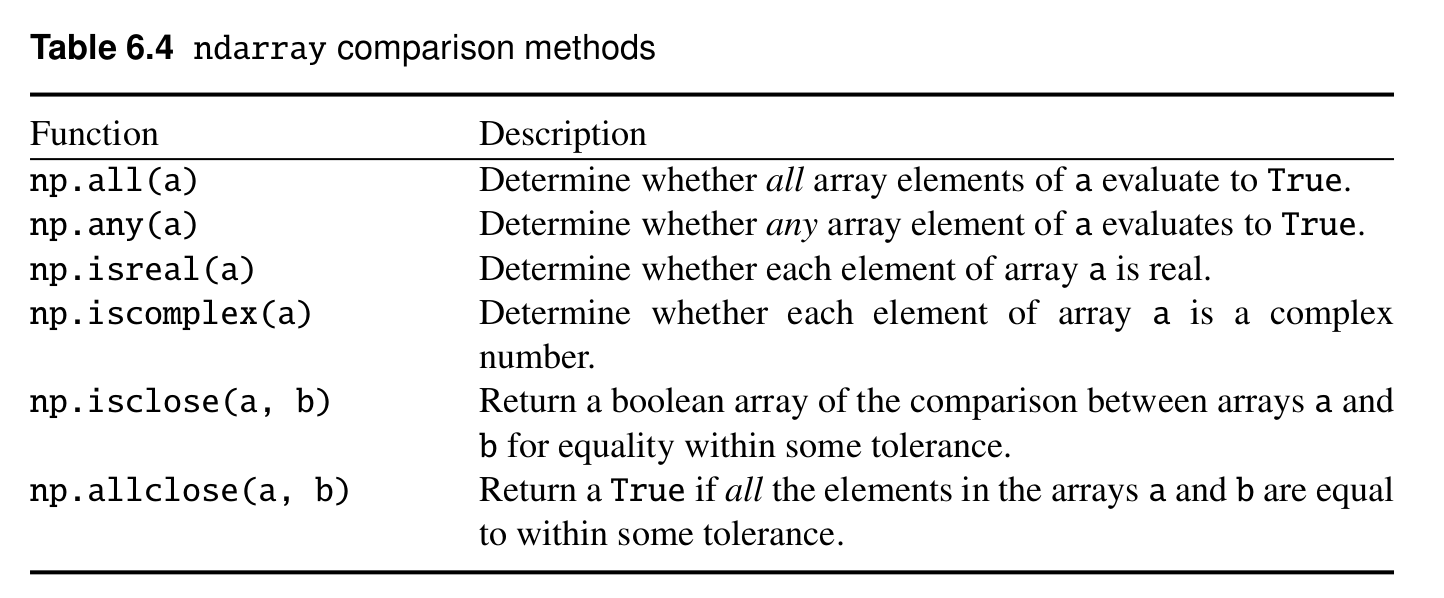

In [ ]:
a = np.array([[1 , 2, 0, 3], [4, 0, 1, 1]])

In [ ]:
a==True

In [ ]:
np.all(a) #todos são True?

In [ ]:
np.any(a) #algum é True?

In [ ]:
np.isreal(a) #quais são reais?

In [ ]:
np.all(np.isreal(a)) #são todos reais?

In [ ]:
np.iscomplex(a) #quais são complex?

In [ ]:
np.any(np.iscomplex(a)) #tem algum complexo?

In [ ]:
np.isnan(a) #quais são nan?

`np.isclose(a,b)`: retorna uma lista de True ou False baseado na comparação

`abs(a-b) <= (atol + rtol*abs(b)`

- *atol*: tolerância absoluta ($10^{-8}$ por padrão);
- *rtol*: tolerância relativa ($10^{-5}$ por padrão);

`np.allclose(a,b)`: retorna True ou False dependendo se `np.isclose(a,b)` tem apenas Trues ou Falses, respectivamente.

Vejamos:

In [ ]:
a = np.array([1.66e-27, 1.38e-23, 6.63e-34, 6.02e23, np.nan])
b = np.array([1.66e-27, 1.66e-27, 1.66e-27, 6.00e23, np.nan])

In [ ]:
np.isclose(a, b)

In [ ]:
#assume nan=nan
np.isclose(a, b, equal_nan=True)

In [ ]:
np.isclose(a, b, atol=0)

In [ ]:
np.allclose(a,b)

In [ ]:
sinx2          = np.sin(np.linspace(0, np.pi, 100))**2
um_menos_cosx2 = 1 - np.cos(np.linspace(0, np.pi, 100))**2

In [ ]:
#devido à precisão finita
sinx2==um_menos_cosx2

In [ ]:
np.isclose(sinx2, um_menos_cosx2)

In [ ]:
np.allclose(sinx2, um_menos_cosx2)

*Problema 6.1.3*: Distribuição gaussiana.

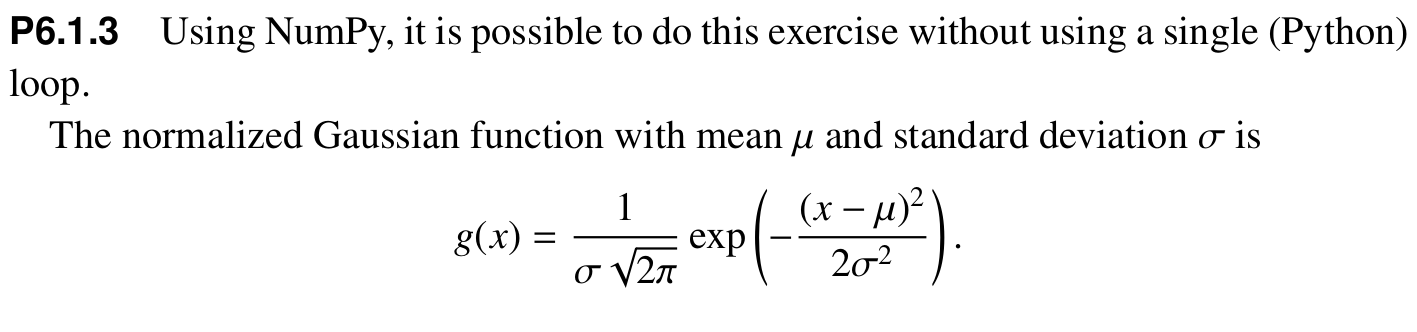

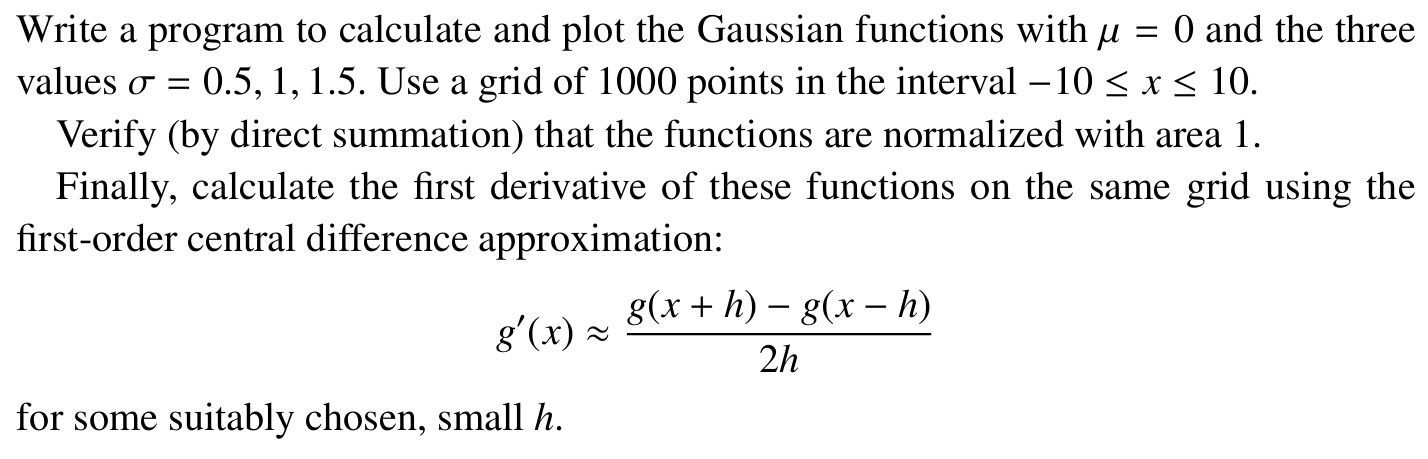

In [ ]:
def gauss(mu=0, sigma=1):
    x = np.linspace(-10,10,1000)
    y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

    return x,y

In [ ]:
plt.plot(*gauss(sigma=0.5))
plt.plot(*gauss(sigma=1.0))
plt.plot(*gauss(sigma=1.5))

In [ ]:
for sigma in [0.5,1.0,1.5]:
    x, y = gauss(sigma=sigma)
    dx = x[1]-x[0]
    print(sigma,np.sum(y)*dx)

In [ ]:
x, y = gauss(sigma=sigma)
dx = x[1]-x[0]
dgauss = (y[1:]-y[0:-1])/dx

In [ ]:
plt.plot(x[1:],dgauss)

In [ ]:
def f_dgauss(mu=1,sigma=0):
    x, y = gauss(mu=mu, sigma=sigma)
    dx = x[1]-x[0]
    dgauss = (y[1:]-y[0:-1])/dx

    return x[1:],dgauss

In [ ]:
plt.plot(*f_dgauss(sigma=0.5))
plt.plot(*f_dgauss(sigma=1.0))
plt.plot(*f_dgauss(sigma=1.5))

Note que não usamos nenhum loop Python para fazer os cálculos. De modo geral, esse tipo de solução é muito mais rápida.

## Leitura e escrita arrays em arquivos

O numpy oferece funções para salvar arrays em arquivos, bem como ler arquivos no formato array.

`np.save` e `np.load` fazem isso usando um formato binário, usualmente chamado de `.npy`.

Por exemplo:

In [ ]:
a = np.array([0,1,2,3,4,5,6,7,8,9])

In [ ]:
np.save('file_a.npy', a)

In [ ]:
a_lido = np.load('file_a.npy')

In [ ]:
a_lido

### `np.loadtxt`

Essa função também lê arquivos. Esses arquivos geralmente estão em formato de texto e, além disso, a função apresenta diversos parâmetros.


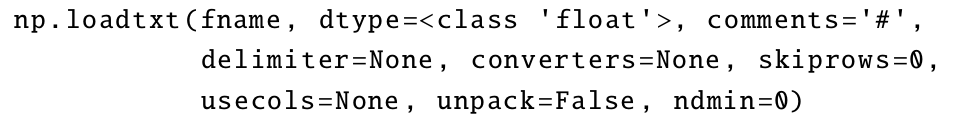

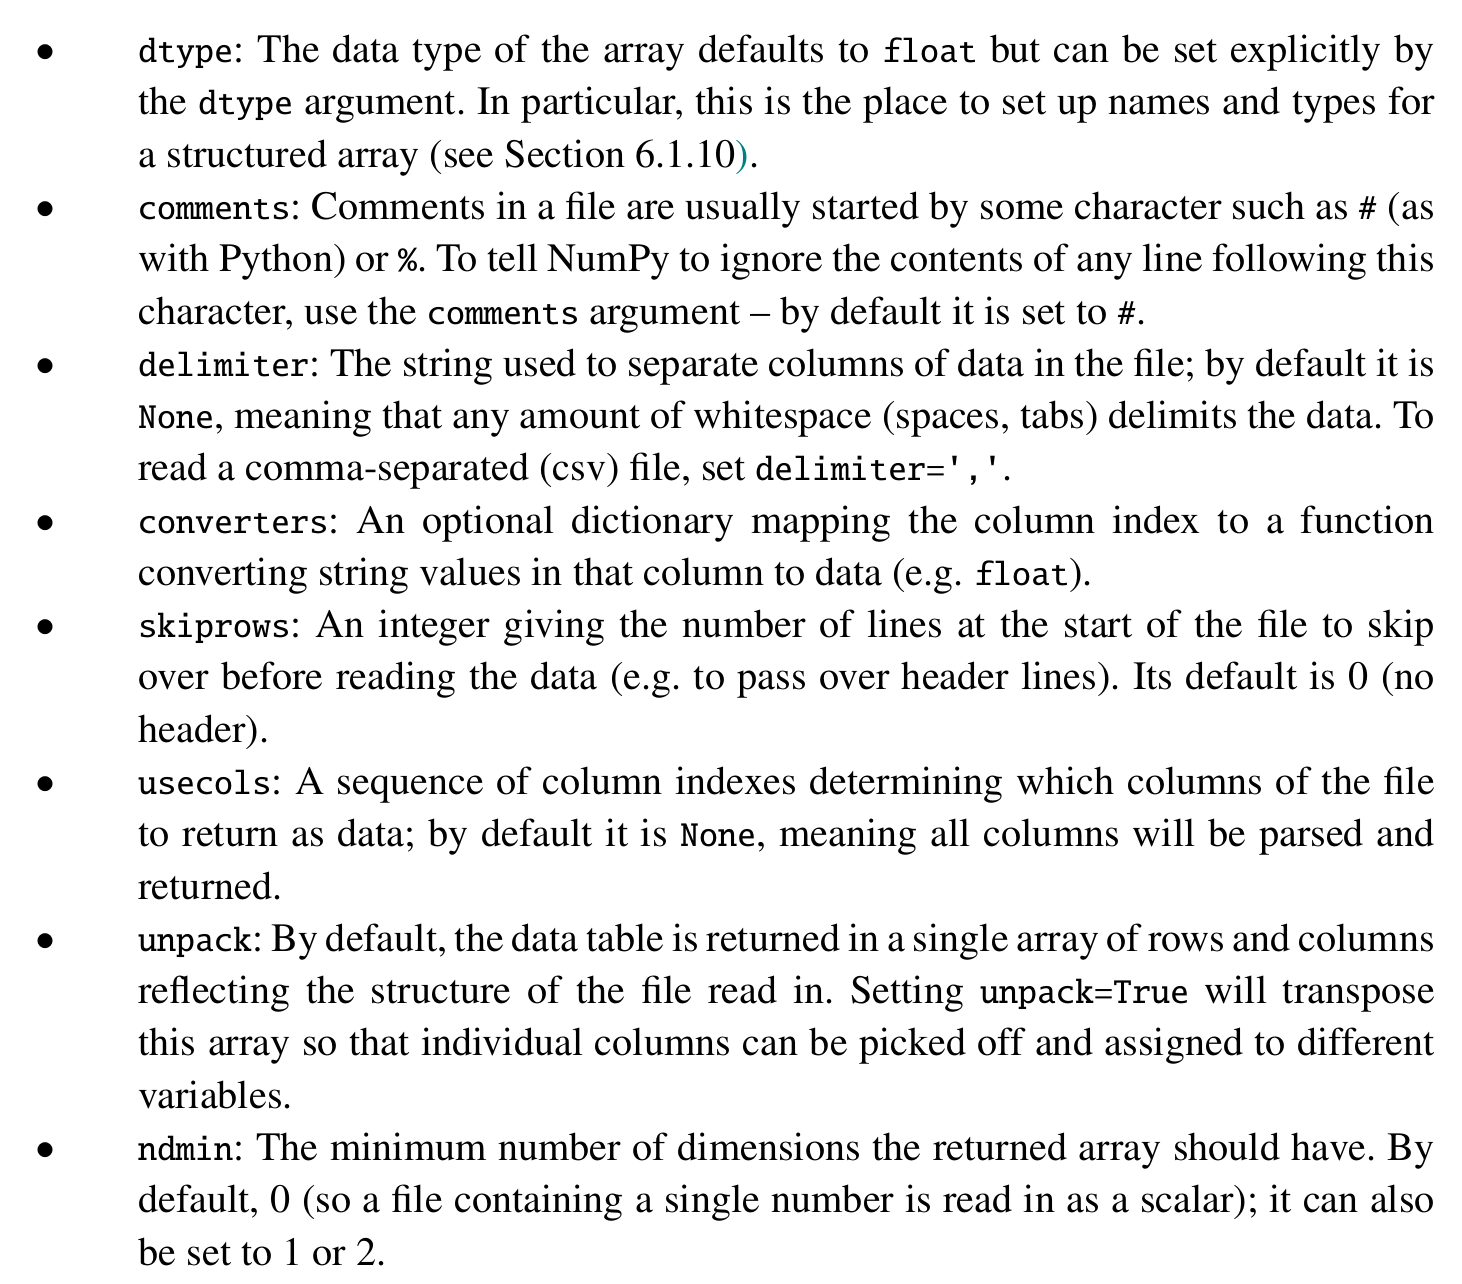

Por exemplo, supondo um arquivo data.txt com várias colunas

```
col1 , col3 , col4 = np.loadtxt('data.txt ', usecols=(0, 2, 3), unpack=True)
```

faz a leitura das colunas 0, 2 e 3 e armazena o resultado em três arrays (col1, col2 e col3).


Exemplo E6.6. Lendo um arquivo no formato:

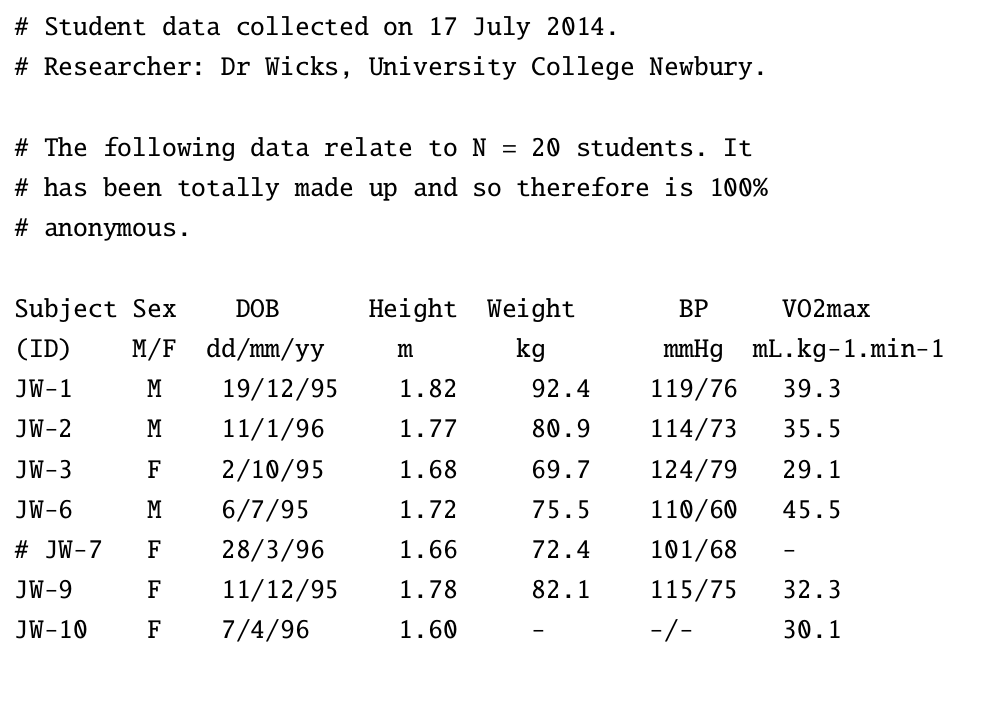

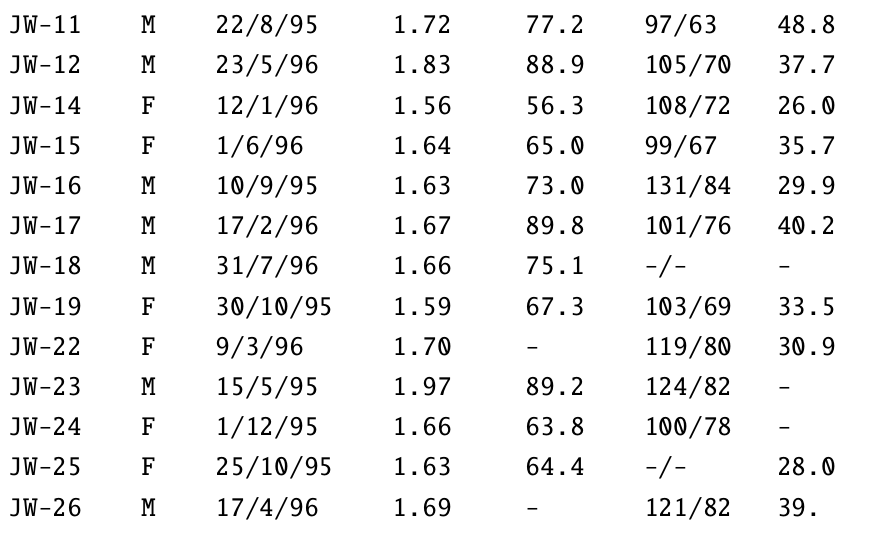

In [ ]:
!wget 'https://scipython.com/static/media/2/examples/E6/eg6-a-student-data.txt'

Vamos supor que nosso interesse é calcular a altura média dos estudantes agrupados por gênero.

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('height', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,3) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9, usecols=(1,3))

In [ ]:
a

In [ ]:
a['gender']==b'M'

In [ ]:
a['height'][(a['gender']==b'M')]

In [ ]:
a['height'][(a['gender']==b'F')]

In [ ]:
a['height'][~(a['gender']==b'M')]

In [ ]:
a['height'][(a['gender']==b'M')].mean()

In [ ]:
a['height'][(a['gender']==b'F')].mean()

Suponha agora que precisamos do peso médio. A coluna de interesse é 4. Porém:

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('weight', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,3) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9, usecols=(1,4))

Existem valores faltantes, que estão marcados com "-". Para resolver esse problema, podemos usar o parâmetro `converters`.

In [ ]:
def parse_weight(s):
    try:
        return float(s)
    except ValueError :
        return np.nan

fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('weight', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,3) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9,
               usecols=(1,4),
               converters={4: parse_weight})

In [ ]:
#sempre que temos um "-", o valor se torna nan
a

In [ ]:
a['weight'][(a['gender']==b'M')].mean()

Veja que a média retorna nan. Devemos fazer algum tratamento nos dados faltantes. Uma possibilidade é remover todos.

In [ ]:
a['weight'][(a['gender']==b'M') & np.isfinite(a['weight'])].mean()

In [ ]:
a['weight'][(a['gender']==b'F') & np.isfinite(a['weight'])].mean()

Usar o `np.nanmean` é outra possibilidade. Essa função automaticamente ignora os nans.

In [ ]:
np.nanmean(a['weight'][(a['gender']==b'M')])

In [ ]:
np.nanmean(a['weight'][(a['gender']==b'F')])

Suponha agora que estamos interessados na pressão arterial. Nesse caso, a coluna de interesse é a 5.

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('bp', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,3) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9,
               usecols=(1,5),
               )

Porém, essa coluna tem dois valores separados por "/". Esses valores correspondem:

- "Pressão sistólica": pressão nas artérias quando o coração contrai ($<130$);
- "Pressão diastólica": pressão nas artérias quando o coração relaxa ($<85$);

Os famosos 12/8...

Para resolver isso, vamos reformatar o dado, substituindo "/" por " ", o que irá criar uma nova coluna no dado.

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype = np.dtype([('gender', '|S1'), ('bps', 'f8'), ('bpd', 'f8')])

def parse_bp(s):
    try:
        return float(s)
    except ValueError:
        return np.nan

#note que é um gerador
def reformat_lines(f):
    for line in f:
        line = line.replace('/',' ')
        yield line

with open(fname) as f:
    gender, bps, bpd = np.loadtxt(reformat_lines(f), dtype, skiprows=9,
                       usecols=(1,7,8),
                       converters={7: parse_bp, 8: parse_bp},
                       unpack=True)

In [ ]:
gender

In [ ]:
bps

In [ ]:
bpd

In [ ]:
#média da alta
np.nanmean(bps), np.nanmean(bps[gender==b'M']), np.nanmean(bps[gender==b'F'])

In [ ]:
#média da baixa
np.nanmean(bpd), np.nanmean(bpd[gender==b'M']), np.nanmean(bpd[gender==b'F'])